# SI 618 - Homework #3: Data Visualization

Version 2023.09.21.1.CT

For this homework assignment, you will the small MovieLens dataset, available via https://files.grouplens.org/datasets/movielens/ml-latest-small.zip. Download that file to get the data, and also take some time to go through the [README](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) file.

Be sure to download your own copy of the dataset -- do not rely on data that you may have downloaded for a previous assignment.

A major challenge for you in this assignment is to devise a plan to tackle each question.  The question states the overall goal, and in some cases hints are provided, but you will need to think carefully about what data you need to answer each of the questions.  You may need to do some preprocessing of the data to get it into a form that you can use for visualization.


Each of the questions is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

**NOTE**: You are only permitted to use the pandas, Seaborn, and matplotlib libraries for creating visualizations in this assignment. You may use other libraries for other purposes, but you may not use them to create visualizations.

<hr>

##### Github co-pilot was installed and used throught this homework assignment

##### Uniqname: mattcalc

First, let's do our usual imports (you might need to import additional modules depending on how you choose to tackle each question):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

And let's read the data (note: you might need to include path information if the data files are not in the same directory as this notebook):

In [2]:
movies = pd.read_csv("../data/ml-latest-small/movies.csv")
ratings = pd.read_csv("../data/ml-latest-small/ratings.csv")
tags = pd.read_csv("../data/ml-latest-small/tags.csv")

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


### Q1: 
Using the `movies` DataFrame, create a visualization that shows the number of movies for each decade from the 1900s to the 2010s.  Use the number in parentheses (e.g. (1975)) at the end of the title as the year.  Drop all rows that do not have a valid year. Be sure to include a title and axis labels.

In [6]:
# Extract the year from the title of each movie
movies["year"] = movies["title"].str.extract(".*\((.*)\).*", expand=True)

# Convert the year to a datetime object
movies["year"] = pd.to_datetime(movies["year"], errors="coerce").dt.year
# print(movies.isna().sum())
# The only nulls are in year so we can drop the rows with NaN
movies.dropna(inplace=True)

# Find decade based on the year
movies["decade"] = movies["year"] // 10 * 10
# print(movies.isna().sum())

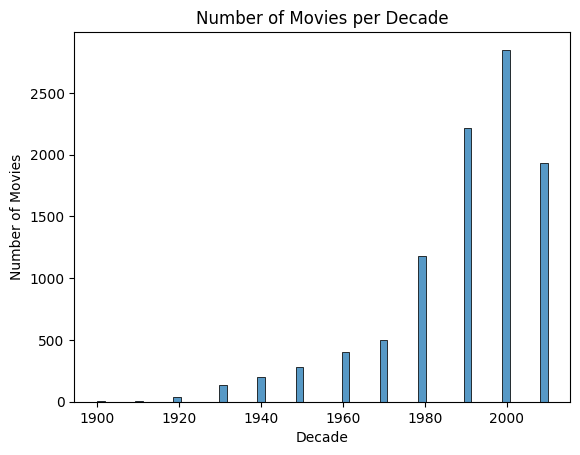

In [7]:
decades_g = sns.histplot(movies["decade"])
decades_g.set(
    xlabel="Decade",
    ylabel="Number of Movies",
    title="Number of Movies per Decade",
)
plt.show()

**Answer:**   
The distribution of movies by decade shown in the graph shows a left skew, with a the most movies being released after 1990

The decade with the most movies were the 2000s

### Q2: 
Create a visualization that shows the number of movies in each genre.

**Hint**: the `pd.DataFrame.explode()` function might be useful here.

Be sure that your axis labels are legible!

In [8]:
# Make a new dataframe to explode the genres over
movies_explode = movies.copy()
movies_explode["genres"] = movies_explode["genres"].str.split("|")
movies_explode = movies_explode.explode("genres")
movies_explode

,movieId,title,genres,year,decade
0,1,Toy Story (1995),Adventure,1995.0,1990.0
0,1,Toy Story (1995),Animation,1995.0,1990.0
0,1,Toy Story (1995),Children,1995.0,1990.0
0,1,Toy Story (1995),Comedy,1995.0,1990.0
0,1,Toy Story (1995),Fantasy,1995.0,1990.0
...,...,...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy,2017.0,2010.0
9739,193585,Flint (2017),Drama,2017.0,2010.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,2018.0,2010.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,2018.0,2010.0


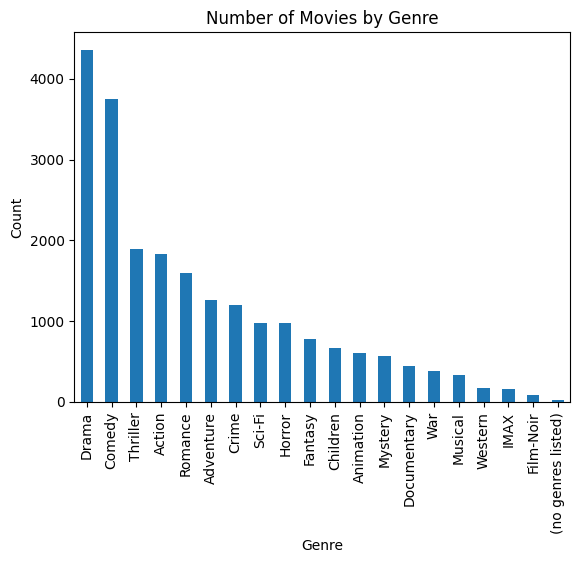

In [9]:
# Graph
genre_count_g = movies_explode["genres"].value_counts().plot(kind="bar")
genre_count_g.set(
    xlabel="Genre", ylabel="Count", title="Number of Movies by Genre"
)
plt.show()

**Answer:**   
The count of movies by genre were generated based on any movie which had that genre within their genre list
A single movie may count towards more than one genres count

Drama and Comedy had signifigantly more movies than the other genres

IMAX and Film-Noir were the genres listed the least by movies

Some movies had no genres listed which are displayed in the (no genres listed) category

### Q3a: 
Create a visualization showing the distribution of the values from the `rating` column of the `ratings` DataFrame.  


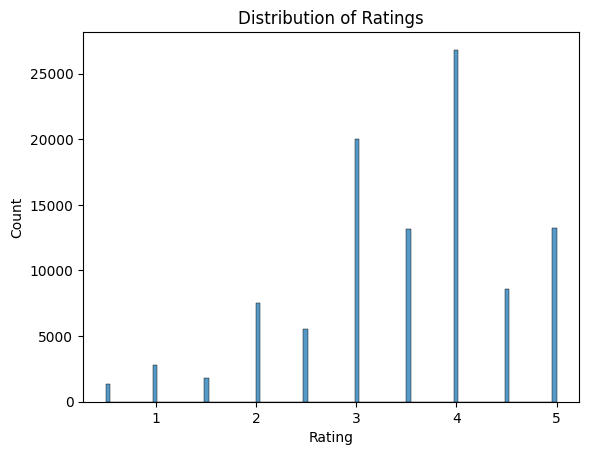

In [10]:
ratings_g = sns.histplot(ratings["rating"])
ratings_g.set(xlabel="Rating", ylabel="Count", title="Distribution of Ratings")
plt.show()

**Answer:**   

Based on the histogram the number of ratings appears to be left-skewed normal with the most ratings at a rating of 4

It is important to note that the half-ratings apppear to be consistently lower in quantity than the full-rating counter parts.


\*\* Added after the next question \*\*

After investigating further it appears that the reduction of half-rating numbers is due to half-ratings being available later.

Assuming that we the rating counts based on time available, we would expected to see a smooth left-skewed normal distribution



### Q3b:
What do you notice about the relative number of whole-number ratings (1,2,3,4,and 5) compared to the half-ratings (0.5, 1.5, 2.5, 3.5, 4.5)?  Investigate the data further to see if you can figure out why that's the case.  (Hint: a scatterplot showing the ratings vs. time might be helpful.)

**Answer:**   
Based on the distribution of the ratings, we can see that the number of half-ratings is signifigantly smaller than the "full ratings" adjacent to them.

Ivestigating further, when the ratings are plotted across time we are able to see that there are no half-ratings from before roughly 2003.

This would indicate that the reason there are fewer half-ratings than full-ratings is due to the lower amount of time for those ratings to be submitted.

This may be due to half-ratings not being an option until later in time.



In [11]:
rating_time_g = sns.scatterplot(x=ratings["date"].dt.date, y=ratings["rating"])
rating_time_g.set(xlabel="Date", ylabel="Rating", title="Rating over Time")
plt.show()

KeyError: 'date'

### Q4:
Write code to confirm the assertion that the ratings ["were created by 610 users between March 29, 1996 and September 24, 2018."](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

In [ ]:
# Converts the timestamp to a datetime object
ratings["date"] = pd.to_datetime(ratings["timestamp"], unit="s")

# Determines how many unique users there are which made ratings between the two dates
ratings[
    (ratings["date"] > "1996-03-29") & (ratings["date"] < "2018-9-24")
].groupby("userId").count().shape[0]

610

**Answer:**   
The timestamp column of the dataframe was converted to a datetime object in a new column `date`

When the ratings datafram is filtered for `date` between the March 19, 1996 and September 24, 2018, the number of users is 610

This confirms that ratings were created by 610 users between March 29, 1996 and September 24, 2018.

### Q5:
Create a visualization showing the number of ratings produced on each day of the week.  

Hint: the `pd.to_datetime()` function might be useful here, as well as the `dt` accessor.

Make sure your axis labels are in a reasonable order.

c:\Users\Matt\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Matt\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Matt\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


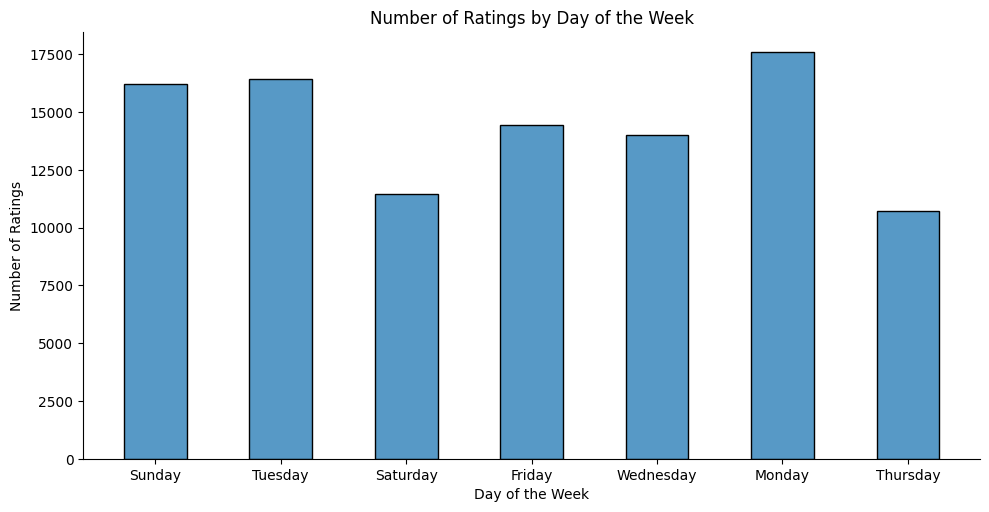

In [ ]:
# Uses .dt.day_name() to get the day of the week from the date column
rating_days_g = sns.displot(
    ratings, x=ratings["date"].dt.day_name(), shrink=0.5, height=5, aspect=2
)
# Fix the labels
rating_days_g.set(
    xlabel="Day of the Week",
    ylabel="Number of Ratings",
    title="Number of Ratings by Day of the Week",
)

plt.show()

**Answer:**   
The graph of Number of Rating by Day of the week shows that Mondays had the highest number of reviews followed by Sunday and Thursday.  Additionally, Saturday and Thursday had the lowest number of reviews out of any day of the week.

The reason for Sunday, Monday, and Tuesday having the highest number of reviews may due to movies traditionally releasing on Friday night/ Saturday Mornings

This may indicate that those who make reviews may do within a day or two after seeing a movie over the weekend, but not on the day which they saw it

### Q6a:

Create a new column called `taglength` in the `tags` DataFrame that contains the number of **characters** in the tag.

**Hint:** the `str.len()` function might be useful here.

In [ ]:
# Create 'taglength' field
tags["taglength"] = tags["tag"].str.len()
tags.head()

,userId,movieId,tag,timestamp,taglength
0,2,60756,funny,1445714994,5
1,2,60756,Highly quotable,1445714996,15
2,2,60756,will ferrell,1445714992,12
3,2,89774,Boxing story,1445715207,12
4,2,89774,MMA,1445715200,3


### Q6b: 
Create a histogram of your newly created `taglength` column.  Experiment with different numbers of bins (or binwidths) until you're happy with the representation.

c:\Users\Matt\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Matt\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


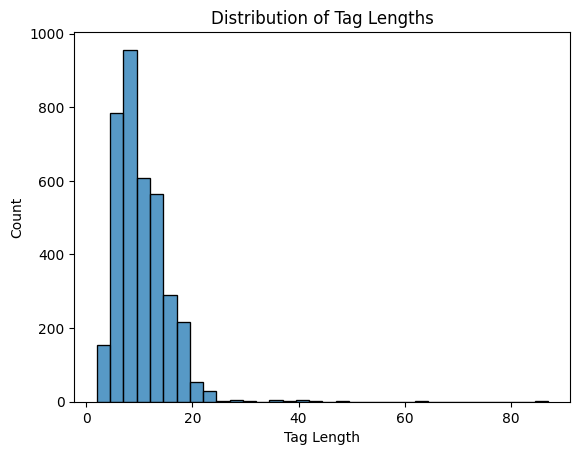

In [ ]:
# Graph
taglength_g = sns.histplot(tags["taglength"], bins=50, binwidth=2.5)
taglength_g.set(
    xlabel="Tag Length", ylabel="Count", title="Distribution of Tag Lengths"
)
plt.show()

**Answer:**   
The distribution of movie Tag lengths appears to be slightly right-skewed normal. 

A majority of the tags are between 0 and 20 characters in length. 

There are some outliers present at greater taglenths, such as just above  60 and around 85.

### Q7:
Create a visualization that shows the average rating for each genre.


In [ ]:
# Merge the exploded genre data with the movie ratings
genre_ratings = pd.merge(movies_explode, ratings, on="movieId")

c:\Users\Matt\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Matt\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


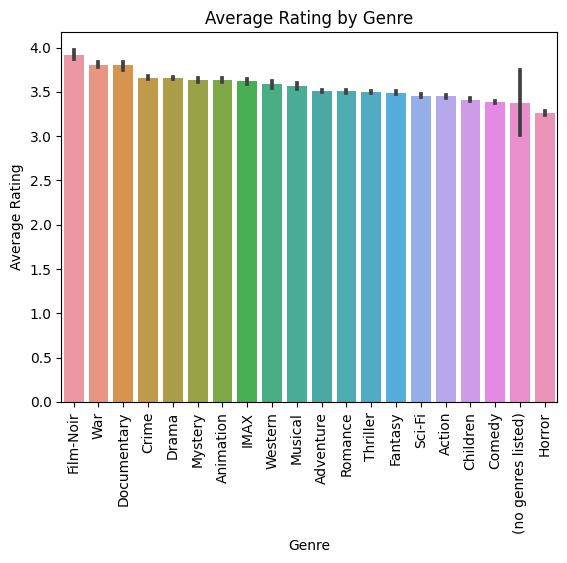

In [ ]:
# Graph
genre_ratings_g = sns.barplot(
    genre_ratings,
    x="genres",
    y="rating",
    order=genre_ratings.groupby("genres")
    .rating.mean()
    .sort_values(ascending=False)
    .index,
)
genre_ratings_g.set_xticklabels(genre_ratings_g.get_xticklabels(), rotation=90)
genre_ratings_g.set(
    xlabel="Genre", ylabel="Average Rating", title="Average Rating by Genre"
)
plt.show()

**Answer:**   
Based on the graph Film-Noir, Way, and Documentary have the highest average ratings.

Most of the genres average  ratings fall between 3.5 and 4, with the expection of Horror which has the lowest average ratings.

It is important to not that the distribution of ratings for movies with no genres listed is signifigantly greater than for the other genres.

Since a movie may be more than one genre, and can count for more than one genre, it is possible that a single movie with many genres and a very high or low average rating, could have a signifigant effect on multiple genres' average ratings

Based on the graph, it appears that users are more likely to leave a high rating than a low rating, and that the cut off for "good" vs "bad" movies is likely higher than the middle of the range (> 2.5)

### Q8:
Create a visualization that shows the distribution of the **number** of ratings of "good" movies (i.e., those with a mean rating of 3.5 or highter) and "bad" movies (i.e., those with a mean rating of less than 3.5), broken down by the decade when the movie was released.

**Hint:** You will need to join the `movies` and `ratings` DataFrames to get the decade information.

**Hint:** You may want to create a box plot or a violin plot (or both).

In [ ]:
avg_ratings = ratings.groupby("movieId").rating.mean()
movies_avg_ratings = pd.merge(movies, avg_ratings, on="movieId")
movies_avg_ratings["rating group"] = pd.cut(
    movies_avg_ratings["rating"],
    bins=[0, 3.5, 5],
    labels=["bad", "good"],
    right=False,
)
movies_avg_ratings

,movieId,title,genres,year,decade,rating,rating group
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,1990.0,3.920930,good
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,1990.0,3.431818,bad
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,1990.0,3.259615,bad
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,1990.0,2.357143,bad
4,5,Father of the Bride Part II (1995),Comedy,1995.0,1990.0,3.071429,bad
...,...,...,...,...,...,...,...
9706,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017.0,2010.0,4.000000,good
9707,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017.0,2010.0,3.500000,good
9708,193585,Flint (2017),Drama,2017.0,2010.0,3.500000,good
9709,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018.0,2010.0,3.500000,good


c:\Users\Matt\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Matt\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Matt\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Matt\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

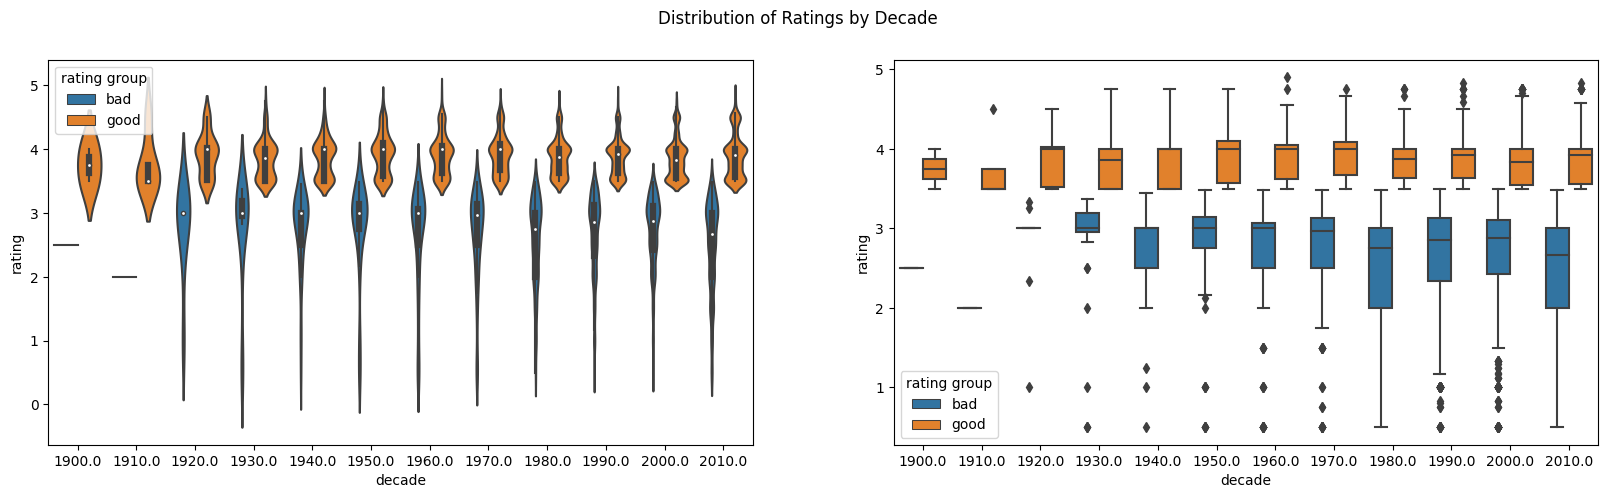

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.violinplot(
    ax=axes[0],
    x=movies_avg_ratings["decade"],
    y=movies_avg_ratings["rating"],
    hue=movies_avg_ratings["rating group"],
)
sns.boxplot(
    ax=axes[1],
    x=movies_avg_ratings["decade"],
    y=movies_avg_ratings["rating"],
    hue=movies_avg_ratings["rating group"],
)
f.suptitle("Distribution of Ratings by Decade")
plt.show()

**Answer:**   
Based on the graphs, it appears that the distribution of movie ratings for both "good" and "bad" movies appears to be consistent across deacdes.

Movies produced during the 1900s, 1910s, and 1920s  do not show a large plot for "bad" movies

This is likely due to the smaller amound of movies produced during those decades.

## END OF NOTEBOOK